In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('bank-full.csv', parse_dates=[0], sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(6), object(11)
memory usage: 5.9+ MB


In [5]:
df.describe()

,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.age = df.age.astype(int)

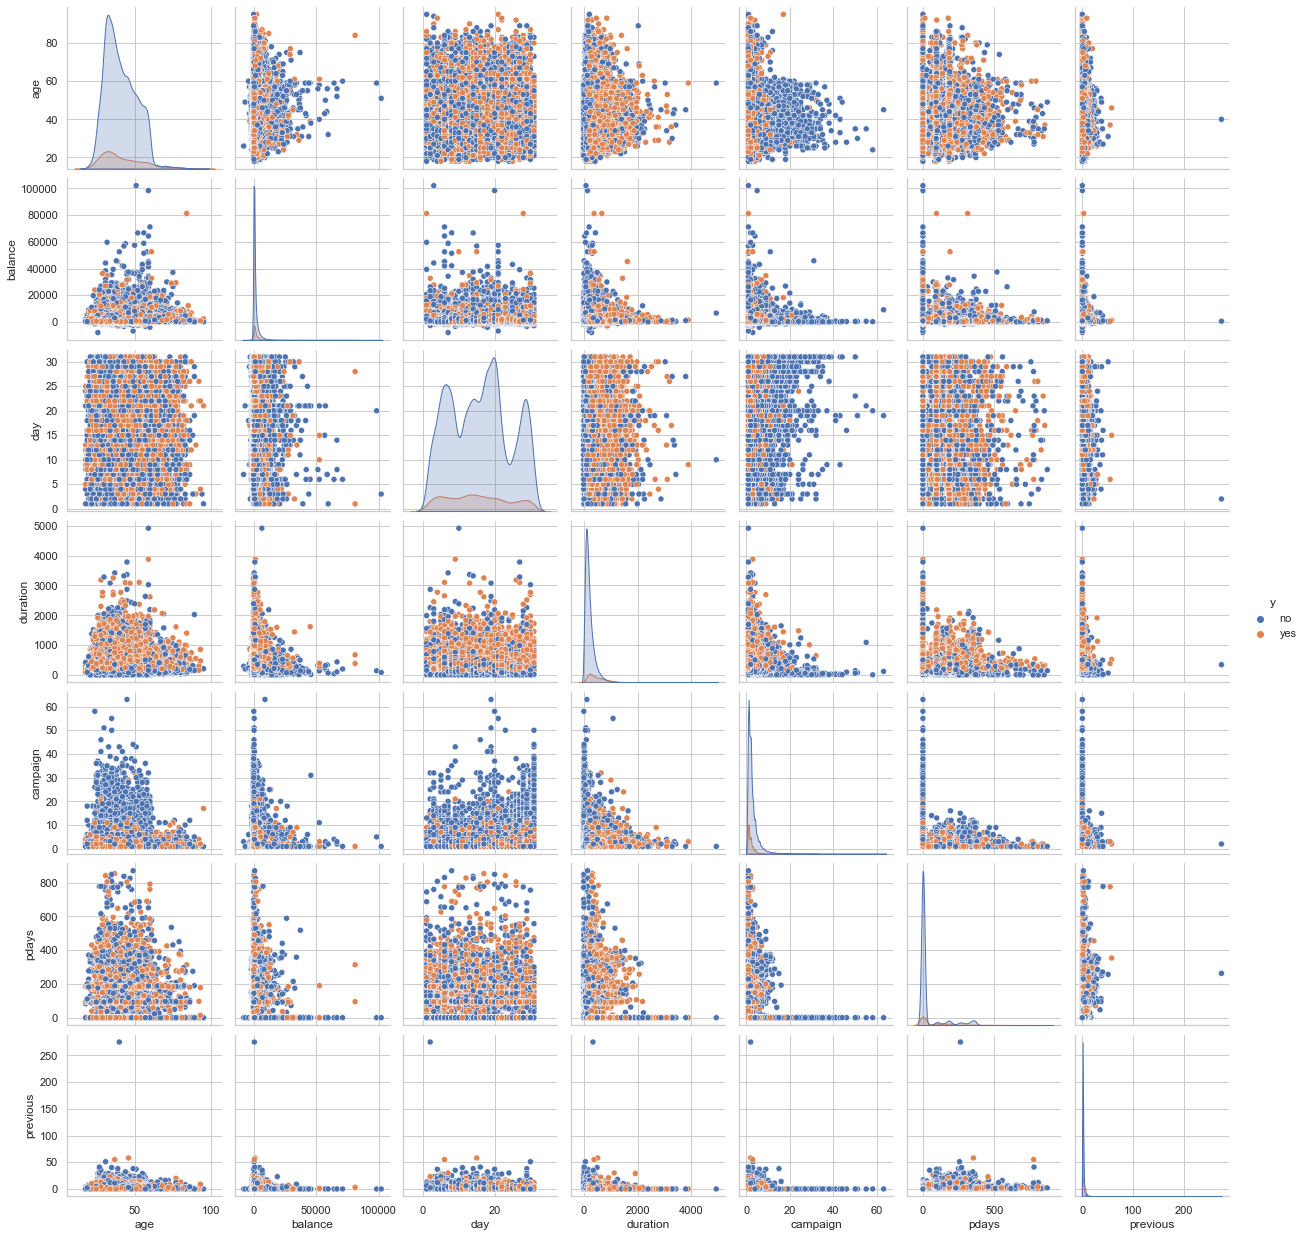

In [53]:
sns.pairplot(df, hue='y')

Text(0.5, 0, 'age')

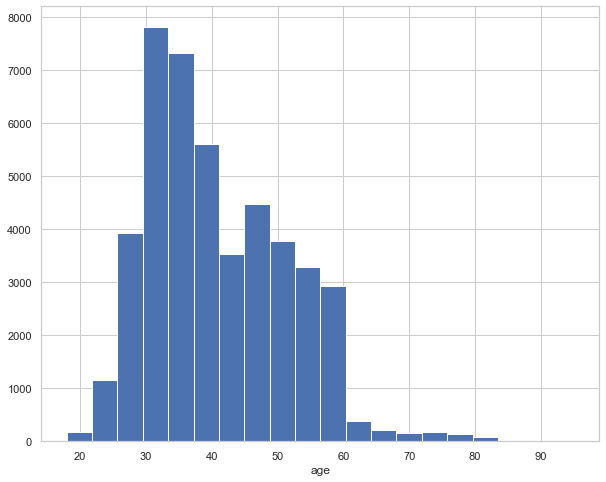

In [8]:
plt.figure(figsize=(10,8))
sns.set_style('whitegrid')
df['age'].hist(bins=20)
plt.xlabel('age')

<AxesSubplot:xlabel='y', ylabel='count'>

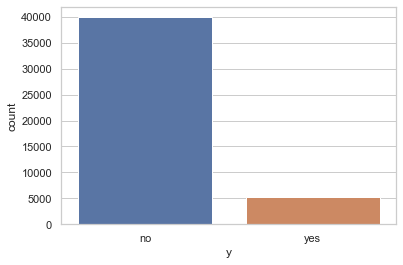

In [9]:
sns.countplot(x='y', data=df)

<AxesSubplot:xlabel='default', ylabel='count'>

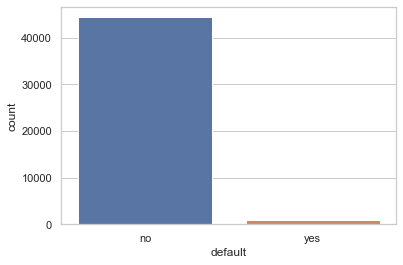

In [10]:
sns.countplot(x='default', data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

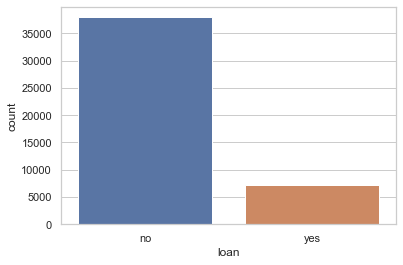

In [11]:
sns.countplot(x='loan', data=df)

<AxesSubplot:xlabel='housing', ylabel='count'>

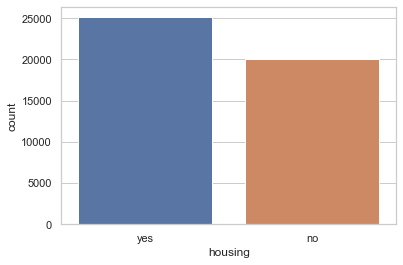

In [12]:
sns.countplot(x='housing', data=df)

<AxesSubplot:>

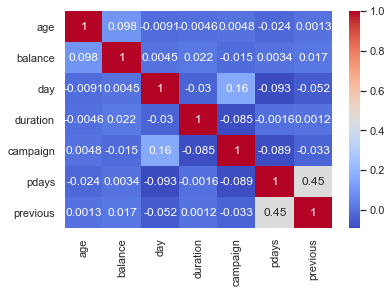

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )

In [14]:
df1 = df.copy()

In [15]:
%timeit
df1['y'] = df1['y'].apply(lambda x: 0 if x=='no' else 1)

In [16]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [17]:
%timeit
df1['default'] = df1['default'].apply(lambda x: 0 if x=='no' else 1)
df1['housing'] = df1['housing'].apply(lambda x: 0 if x=='no' else 1)
df1['loan'] = df1['loan'].apply(lambda x: 0 if x=='no' else 1)

In [18]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
dummy = pd.get_dummies(df1['job'])

In [20]:
df_new = pd.concat([df1, dummy], axis=1)

In [21]:
#df_new.head()

In [22]:
dummy1 = pd.get_dummies(df_new['marital'])
dummy2 = pd.get_dummies(df_new['education'])
dummy3 = pd.get_dummies(df_new['contact'])

In [23]:
df_1= pd.concat([df_new, dummy1, dummy2, dummy3], axis=1)

In [24]:
df_1 = df_new.drop(['job', 'marital', 'education', 'contact', 'poutcome'], axis=1)

In [25]:
#df_1.head()

In [26]:
df_1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'y', 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown'],
      dtype='object')

In [27]:
df_1 = df_1[['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'unknown' , 'admin.',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'y']]

In [28]:
df_1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,y
0,58,0,2143,1,0,5,may,261,1,-1,...,0,0,1,0,0,0,0,0,0,0
1,44,0,29,1,0,5,may,151,1,-1,...,0,0,0,0,0,0,0,1,0,0
2,33,0,2,1,1,5,may,76,1,-1,...,1,0,0,0,0,0,0,0,0,0
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,0,0,0,0,0,0,0,0
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45211 non-null  int32 
 1   default        45211 non-null  int64 
 2   balance        45211 non-null  int64 
 3   housing        45211 non-null  int64 
 4   loan           45211 non-null  int64 
 5   day            45211 non-null  int64 
 6   month          45211 non-null  object
 7   duration       45211 non-null  int64 
 8   campaign       45211 non-null  int64 
 9   pdays          45211 non-null  int64 
 10  previous       45211 non-null  int64 
 11  unknown        45211 non-null  uint8 
 12  admin.         45211 non-null  uint8 
 13  blue-collar    45211 non-null  uint8 
 14  entrepreneur   45211 non-null  uint8 
 15  housemaid      45211 non-null  uint8 
 16  management     45211 non-null  uint8 
 17  retired        45211 non-null  uint8 
 18  self-employed  45211 non-n

In [30]:
dummy4 = pd.get_dummies(df_1['month'])

In [31]:
df_1 = pd.concat([df_1, dummy4], axis=1)

In [32]:
df_1.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,may,261,1,-1,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,may,151,1,-1,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,may,76,1,-1,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,may,92,1,-1,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,may,198,1,-1,...,0,0,0,0,0,0,1,0,0,0


In [33]:
df_1 = df_1.drop(['month'], axis=1)

# Splitting the data

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X = df_1.drop(['y'], axis=1)
Y = df_1['y']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Pipeline and Prediction

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [38]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())

In [39]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [40]:
prediction = pipe.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'Predicted Y')

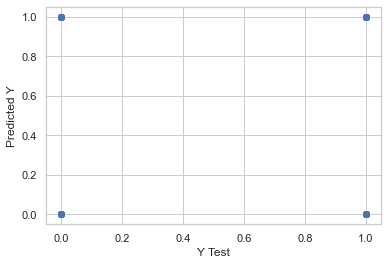

In [41]:
plt.scatter(Y_test,prediction)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [43]:
print(classification_report(Y_test,prediction))
'\n'
print(confusion_matrix(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     11966
           1       0.60      0.25      0.36      1598

    accuracy                           0.89     13564
   macro avg       0.75      0.62      0.65     13564
weighted avg       0.87      0.89      0.87     13564

[[11692   274]
 [ 1193   405]]


In [44]:
pipe.score(X_test, Y_test)

0.8918460631082277

# Saving the model

In [45]:
import pickle
file_name = 'Bank_Marketing.sav'
pickle.dump(pipe, open(file_name, 'wb'))

In [46]:
#To load the model we can use 
#load_model = pickle.load(open(file_name, 'rb'))

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier())

In [49]:
pipe2.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [50]:
prediction1 = pipe2.predict(X_test)
prediction1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'Predicted Y1')

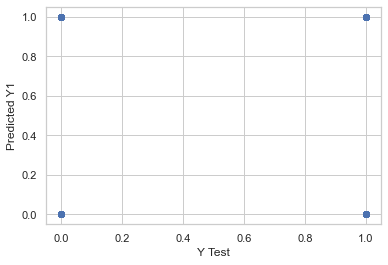

In [51]:
plt.scatter(Y_test,prediction1)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y1')

In [52]:
print(classification_report(Y_test,prediction1))
'\n'
print(confusion_matrix(Y_test,prediction1))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.63      0.39      0.48      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564

[[11602   364]
 [  974   624]]


from comparing both classifier report, we can easily say that Random Forest Classifier has better performance than Logistic